# Importer les bibliothèques nécessaires
Importer les bibliothèques Python nécessaires comme pandas, numpy, matplotlib, seaborn, etc.

In [1]:
# Importing necessary libraries for EDA
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization

# Setting visualization styles
sns.set(style="whitegrid")  # Set Seaborn style
plt.rcParams["figure.figsize"] = (10, 6)  # Set default figure size

# Charger les données
Charger les fichiers de données depuis le répertoire './Data/train' en utilisant pandas.

In [2]:
# Charger les données depuis le répertoire './Data/train'
import os

# Définir le chemin du répertoire contenant les fichiers de données
data_dir = './Data/train'

# Lister tous les fichiers dans le répertoire
data_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Charger chaque fichier CSV dans un dictionnaire de DataFrames
dataframes = {}
for file in data_files:
    file_path = os.path.join(data_dir, file)
    df_name = os.path.splitext(file)[0]  # Utiliser le nom du fichier sans extension comme clé
    dataframes[df_name] = pd.read_csv(file_path)

# Afficher les noms des fichiers chargés et leurs dimensions
for name, df in dataframes.items():
    print(f"Dataset '{name}' chargé avec {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Dataset 'df_Customers' chargé avec 89316 lignes et 4 colonnes.
Dataset 'df_Products' chargé avec 89316 lignes et 6 colonnes.
Dataset 'df_Payments' chargé avec 89316 lignes et 5 colonnes.
Dataset 'df_Orders' chargé avec 89316 lignes et 7 colonnes.
Dataset 'df_OrderItems' chargé avec 89316 lignes et 5 colonnes.


# Analyse structurelle des données et relations
Examiner la structure des données, les types de colonnes, les relations entre les tables (si plusieurs fichiers).

In [3]:
# Analyse structurelle des données et relations

# Examiner la structure des données pour chaque DataFrame
for name, df in dataframes.items():
    print(f"\nStructure du dataset '{name}':")
    print(df.info())  # Afficher les informations sur les colonnes et les types de données
    print("\nAperçu des premières lignes:")
    print(df.head())  # Afficher les premières lignes du DataFrame
    print("\nStatistiques descriptives:")
    print(df.describe(include='all'))  # Afficher les statistiques descriptives

# Vérifier les relations entre les tables (si plusieurs fichiers)
if len(dataframes) > 1:
    print("\nRelations potentielles entre les tables:")
    for name1, df1 in dataframes.items():
        for name2, df2 in dataframes.items():
            if name1 != name2:
                # Identifier les colonnes communes entre deux DataFrames
                common_columns = set(df1.columns).intersection(set(df2.columns))
                if common_columns:
                    print(f"Colonnes communes entre '{name1}' et '{name2}': {common_columns}")


Structure du dataset 'df_Customers':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB
None

Aperçu des premières lignes:
    customer_id  customer_zip_code_prefix       customer_city customer_state
0  hCT0x9JiGXBQ                     58125     varzea paulista             SP
1  PxA7fv9spyhx                      3112  armacao dos buzios             RJ
2  g3nXeJkGI0Qw                      4119             jandira             SP
3  EOEsCQ6QlpIg                     18212          uberlandia             MG
4  mVz5LO2Vd6cL                     88868            ilhabel

# Qualité des données
Vérifier les valeurs manquantes, les doublons, les valeurs aberrantes et les incohérences dans les données.

In [4]:
# Vérification des valeurs manquantes
for name, df in dataframes.items():
    print(f"\nVérification des valeurs manquantes pour le dataset '{name}':")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])  # Afficher uniquement les colonnes avec des valeurs manquantes

# Vérification des doublons
for name, df in dataframes.items():
    print(f"\nVérification des doublons pour le dataset '{name}':")
    duplicate_count = df.duplicated().sum()
    print(f"Nombre de doublons: {duplicate_count}")

# Détection des valeurs aberrantes (outliers) pour les colonnes numériques
for name, df in dataframes.items():
    print(f"\nDétection des valeurs aberrantes pour le dataset '{name}':")
    numeric_columns = df.select_dtypes(include=np.number).columns
    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Colonne '{col}': {len(outliers)} valeurs aberrantes détectées")

# Vérification des incohérences dans les données catégoriques
for name, df in dataframes.items():
    print(f"\nVérification des incohérences pour les colonnes catégoriques dans le dataset '{name}':")
    categorical_columns = df.select_dtypes(include='object').columns
    for col in categorical_columns:
        unique_values = df[col].unique()
        print(f"Colonne '{col}': {len(unique_values)} valeurs uniques détectées")


Vérification des valeurs manquantes pour le dataset 'df_Customers':
Series([], dtype: int64)

Vérification des valeurs manquantes pour le dataset 'df_Products':
product_category_name    308
product_weight_g          15
product_length_cm         15
product_height_cm         15
product_width_cm          15
dtype: int64

Vérification des valeurs manquantes pour le dataset 'df_Payments':
Series([], dtype: int64)

Vérification des valeurs manquantes pour le dataset 'df_Orders':
order_approved_at               9
order_delivered_timestamp    1889
dtype: int64

Vérification des valeurs manquantes pour le dataset 'df_OrderItems':
Series([], dtype: int64)

Vérification des doublons pour le dataset 'df_Customers':
Nombre de doublons: 0

Vérification des doublons pour le dataset 'df_Products':
Nombre de doublons: 61865

Vérification des doublons pour le dataset 'df_Payments':
Nombre de doublons: 0

Vérification des doublons pour le dataset 'df_Orders':
Nombre de doublons: 0

Vérification des doub

# Analyse temporelle
Analyser les tendances temporelles des données, comme les ventes ou les commandes au fil du temps.


Analyse temporelle pour le dataset 'df_Customers':


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed indivi

Colonne temporelle détectée: 'customer_zip_code_prefix'


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


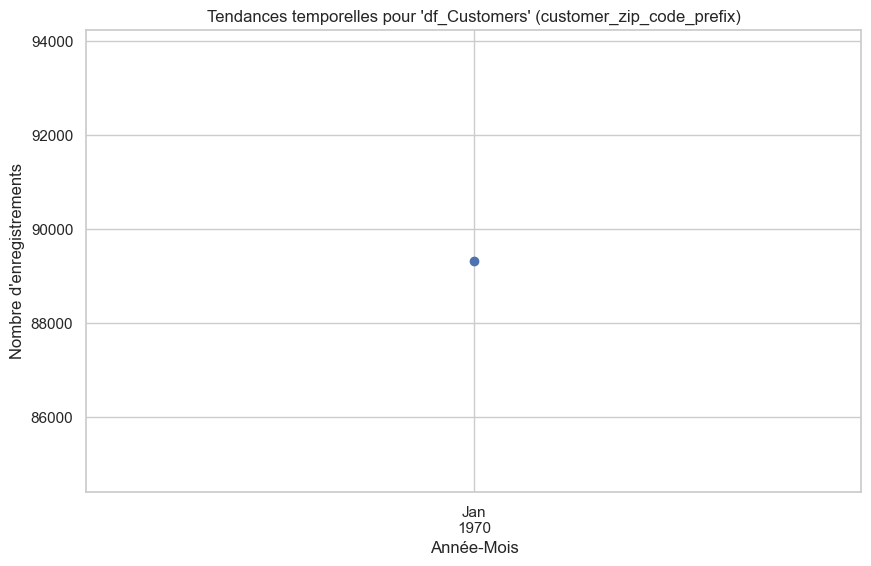

/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]



Analyse temporelle pour le dataset 'df_Products':


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]


Aucune colonne temporelle détectée dans ce dataset.

Analyse temporelle pour le dataset 'df_Payments':
Colonne temporelle détectée: 'payment_sequential'


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


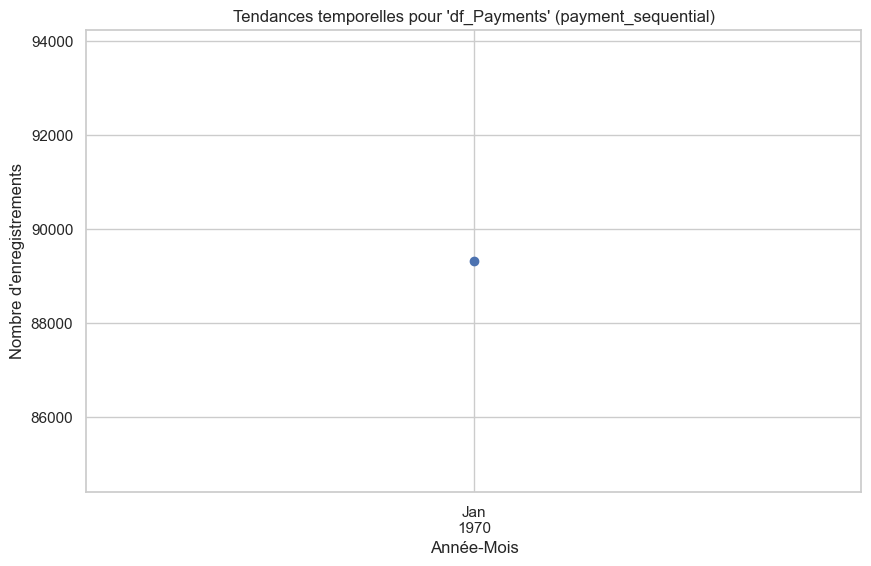

Colonne temporelle détectée: 'payment_installments'


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


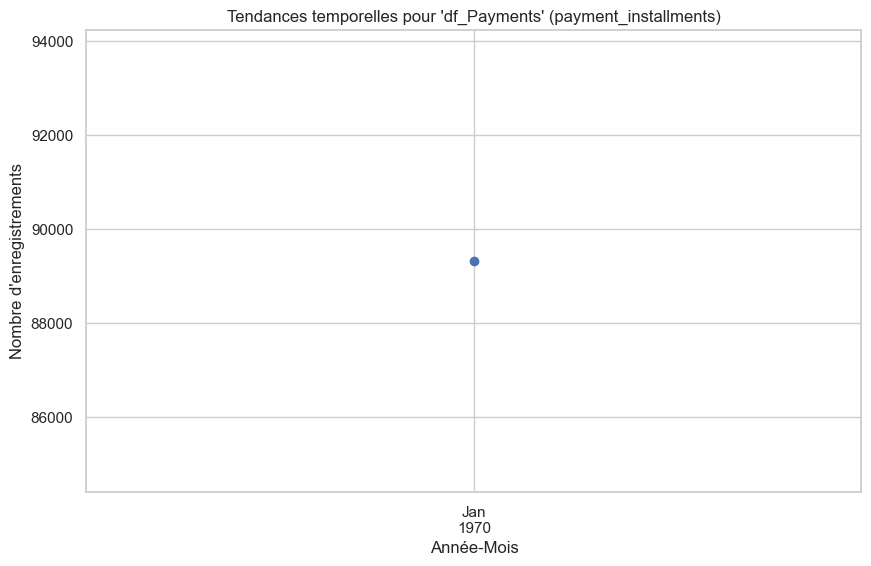

Colonne temporelle détectée: 'payment_value'


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


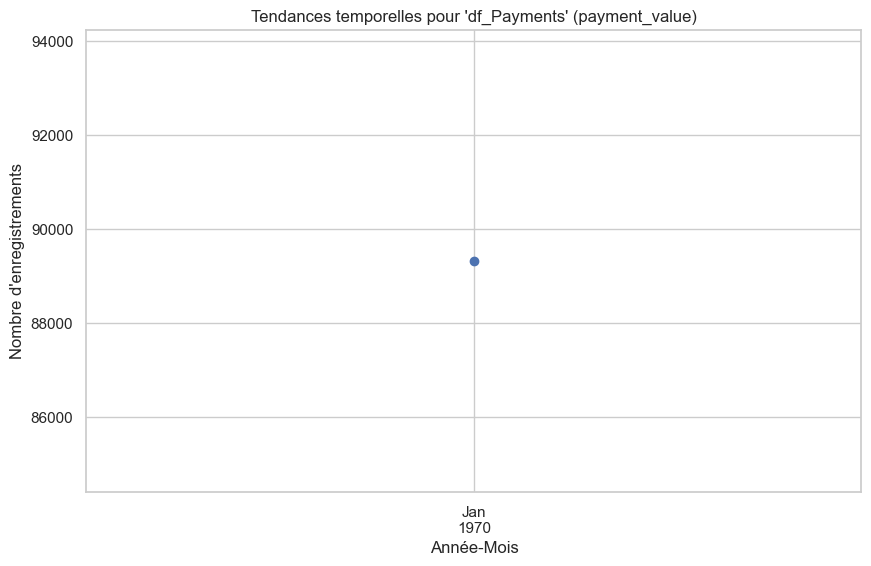

/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]



Analyse temporelle pour le dataset 'df_Orders':


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]


Colonne temporelle détectée: 'order_purchase_timestamp'


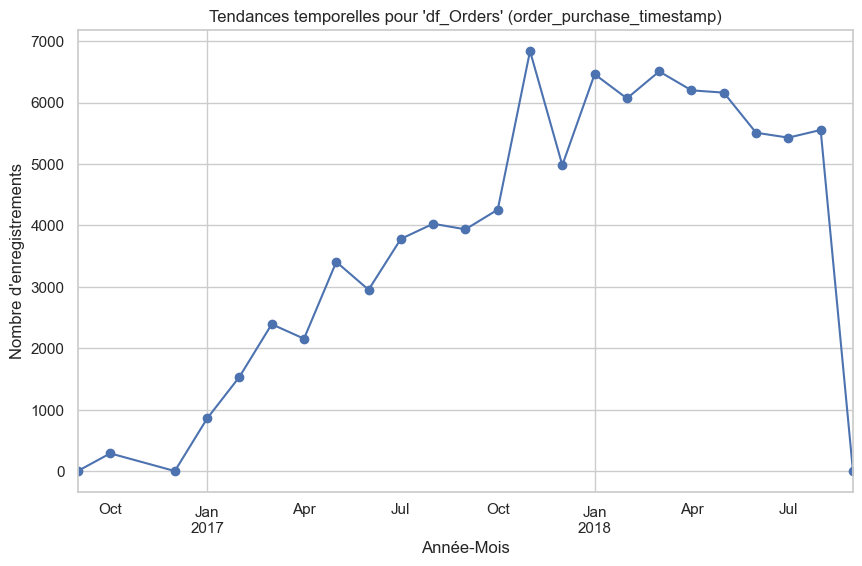

Colonne temporelle détectée: 'order_estimated_delivery_date'


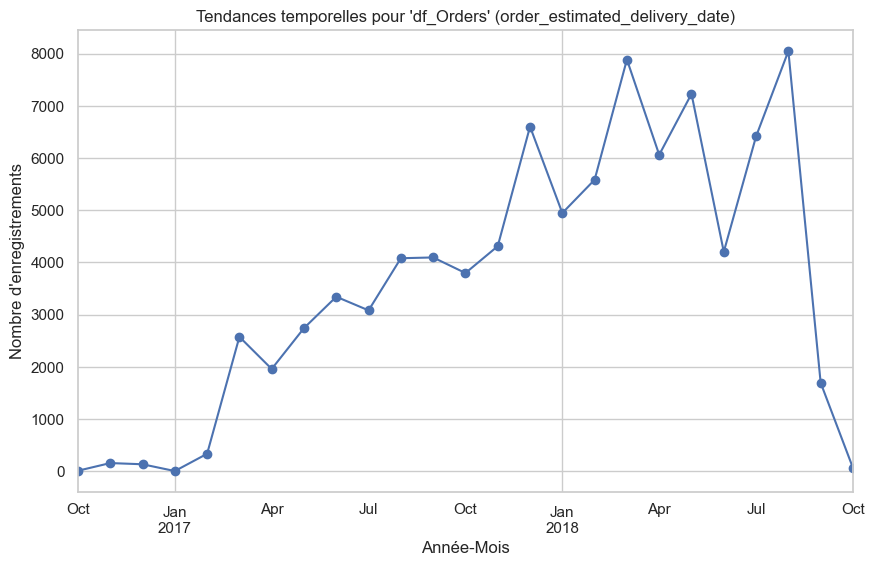


Analyse temporelle pour le dataset 'df_OrderItems':


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]


Colonne temporelle détectée: 'price'


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/3875036113.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


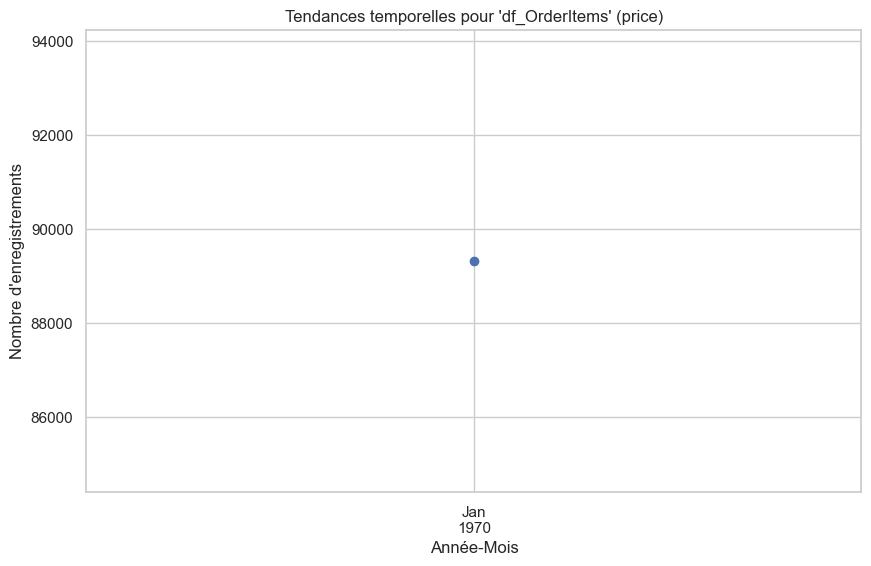

Colonne temporelle détectée: 'shipping_charges'


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


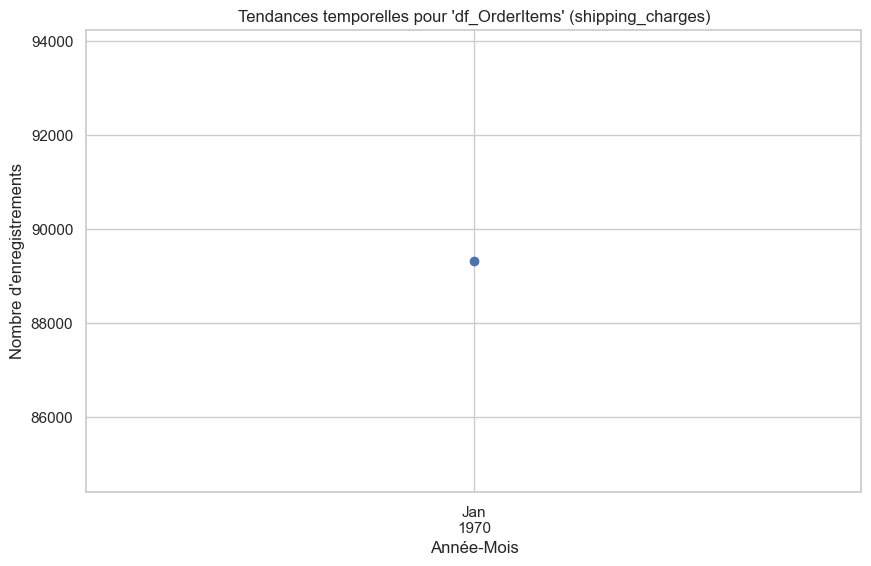

In [5]:
# Analyse temporelle

# Analyser les tendances temporelles des données, comme les ventes ou les commandes au fil du temps
for name, df in dataframes.items():
    print(f"\nAnalyse temporelle pour le dataset '{name}':")
    
    # Vérifier si une colonne de type datetime existe ou peut être convertie
    datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
    
    if datetime_columns:
        for col in datetime_columns:
            print(f"Colonne temporelle détectée: '{col}'")
            
            # Convertir en datetime si ce n'est pas déjà fait
            if not pd.api.types.is_datetime64_any_dtype(df[col]):
                df[col] = pd.to_datetime(df[col], errors='coerce')
            
            # Grouper par année et mois pour analyser les tendances
            df['YearMonth'] = df[col].dt.to_period('M')
            temporal_trends = df.groupby('YearMonth').size()
            
            # Visualiser les tendances temporelles
            plt.figure()
            temporal_trends.plot(kind='line', marker='o', title=f"Tendances temporelles pour '{name}' ({col})")
            plt.xlabel("Année-Mois")
            plt.ylabel("Nombre d'enregistrements")
            plt.grid(True)
            plt.show()
    else:
        print("Aucune colonne temporelle détectée dans ce dataset.")

# Analyse des ventes
Explorer les données de ventes, y compris les produits les plus vendus, les revenus par catégorie, etc.

In [6]:
# Analyse des ventes

# Analyser les données de ventes pour chaque dataset
for name, df in dataframes.items():
    print(f"\nAnalyse des ventes pour le dataset '{name}':")
    
    # Vérifier si des colonnes pertinentes pour les ventes existent
    sales_columns = [col for col in df.columns if 'vente' in col.lower() or 'sales' in col.lower()]
    revenue_columns = [col for col in df.columns if 'revenu' in col.lower() or 'revenue' in col.lower()]
    product_columns = [col for col in df.columns if 'produit' in col.lower() or 'product' in col.lower()]
    category_columns = [col for col in df.columns if 'categorie' in col.lower() or 'category' in col.lower()]
    
    if sales_columns or revenue_columns:
        # Analyser les produits les plus vendus
        if product_columns:
            for col in product_columns:
                top_products = df[col].value_counts().head(10)
                print(f"Produits les plus vendus dans '{col}':")
                print(top_products)
                
                # Visualiser les produits les plus vendus
                plt.figure()
                top_products.plot(kind='bar', title=f"Top 10 des produits les plus vendus ({col})")
                plt.xlabel("Produit")
                plt.ylabel("Nombre de ventes")
                plt.grid(axis='y')
                plt.show()
        
        # Analyser les revenus par catégorie
        if category_columns and revenue_columns:
            for cat_col in category_columns:
                for rev_col in revenue_columns:
                    revenue_by_category = df.groupby(cat_col)[rev_col].sum().sort_values(ascending=False)
                    print(f"Revenus par catégorie dans '{cat_col}' et '{rev_col}':")
                    print(revenue_by_category)
                    
                    # Visualiser les revenus par catégorie
                    plt.figure()
                    revenue_by_category.plot(kind='bar', title=f"Revenus par catégorie ({cat_col})")
                    plt.xlabel("Catégorie")
                    plt.ylabel("Revenus")
                    plt.grid(axis='y')
                    plt.show()
        
        # Analyser les tendances des ventes au fil du temps
        if 'YearMonth' in df.columns and sales_columns:
            for sales_col in sales_columns:
                sales_trends = df.groupby('YearMonth')[sales_col].sum()
                print(f"Tendances des ventes pour '{sales_col}':")
                print(sales_trends)
                
                # Visualiser les tendances des ventes
                plt.figure()
                sales_trends.plot(kind='line', marker='o', title=f"Tendances des ventes ({sales_col})")
                plt.xlabel("Année-Mois")
                plt.ylabel("Ventes")
                plt.grid(True)
                plt.show()
    else:
        print("Aucune colonne pertinente pour les ventes détectée dans ce dataset.")


Analyse des ventes pour le dataset 'df_Customers':
Aucune colonne pertinente pour les ventes détectée dans ce dataset.

Analyse des ventes pour le dataset 'df_Products':
Aucune colonne pertinente pour les ventes détectée dans ce dataset.

Analyse des ventes pour le dataset 'df_Payments':
Aucune colonne pertinente pour les ventes détectée dans ce dataset.

Analyse des ventes pour le dataset 'df_Orders':
Aucune colonne pertinente pour les ventes détectée dans ce dataset.

Analyse des ventes pour le dataset 'df_OrderItems':
Aucune colonne pertinente pour les ventes détectée dans ce dataset.


# Analyse des clients
Analyser les données des clients, comme les segments de clientèle, les comportements d'achat, etc.


Analyse des clients pour le dataset 'df_Customers':
Nombre de clients uniques dans 'customer_id': 89316
Nombre de clients uniques dans 'customer_zip_code_prefix': 13930
Nombre de clients uniques dans 'customer_city': 3735
Nombre de clients uniques dans 'customer_state': 27

Analyse des clients pour le dataset 'df_Products':
Aucune colonne pertinente pour les clients détectée dans ce dataset.

Analyse des clients pour le dataset 'df_Payments':
Aucune colonne pertinente pour les clients détectée dans ce dataset.

Analyse des clients pour le dataset 'df_Orders':
Nombre de clients uniques dans 'customer_id': 89316
Comportements d'achat dans 'order_purchase_timestamp':
order_purchase_timestamp
2017-08-08 20:26:31    87
2017-03-09 23:39:26    32
2017-09-23 14:56:45    28
2018-06-07 22:32:24    24
2017-09-18 18:53:15    24
                       ..
2018-01-21 22:03:00     1
2018-01-20 20:58:15     1
2017-12-04 14:25:44     1
2018-01-10 14:55:31     1
2018-08-11 08:04:22     1
Name: count, Le

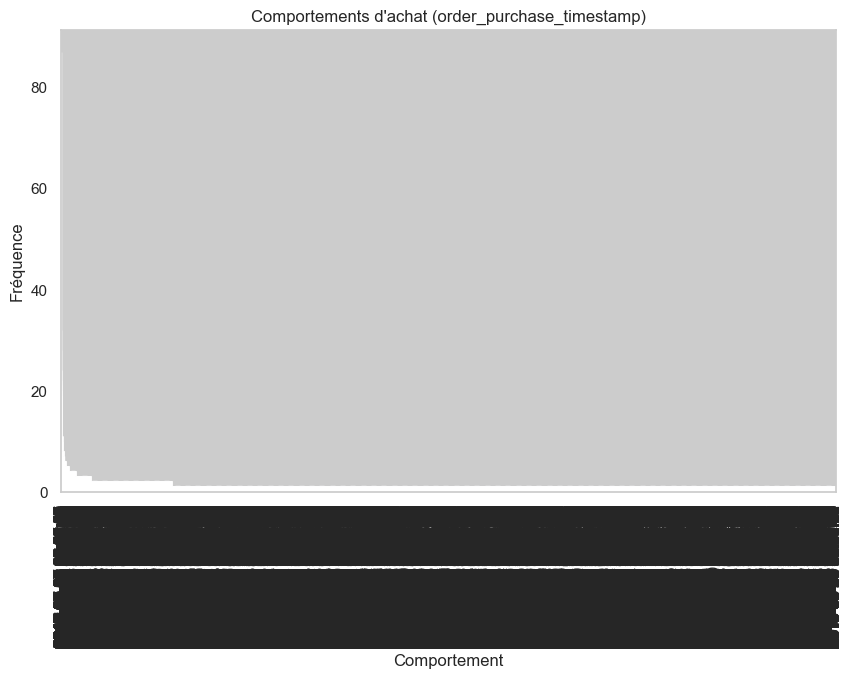


Analyse des clients pour le dataset 'df_OrderItems':
Aucune colonne pertinente pour les clients détectée dans ce dataset.


In [7]:
# Analyse des clients

# Analyser les données des clients pour chaque dataset
for name, df in dataframes.items():
    print(f"\nAnalyse des clients pour le dataset '{name}':")
    
    # Vérifier si des colonnes pertinentes pour les clients existent
    client_columns = [col for col in df.columns if 'client' in col.lower() or 'customer' in col.lower()]
    segment_columns = [col for col in df.columns if 'segment' in col.lower()]
    behavior_columns = [col for col in df.columns if 'achat' in col.lower() or 'purchase' in col.lower()]
    
    if client_columns:
        for col in client_columns:
            # Analyser les clients uniques
            unique_clients = df[col].nunique()
            print(f"Nombre de clients uniques dans '{col}': {unique_clients}")
            
            # Visualiser la répartition des clients si applicable
            if unique_clients < 20:  # Visualiser uniquement si le nombre de clients est raisonnable
                client_distribution = df[col].value_counts()
                plt.figure()
                client_distribution.plot(kind='bar', title=f"Répartition des clients ({col})")
                plt.xlabel("Client")
                plt.ylabel("Fréquence")
                plt.grid(axis='y')
                plt.show()
    
    if segment_columns:
        for col in segment_columns:
            # Analyser les segments de clientèle
            segment_distribution = df[col].value_counts()
            print(f"Répartition des segments de clientèle dans '{col}':")
            print(segment_distribution)
            
            # Visualiser la répartition des segments
            plt.figure()
            segment_distribution.plot(kind='bar', title=f"Répartition des segments de clientèle ({col})")
            plt.xlabel("Segment")
            plt.ylabel("Fréquence")
            plt.grid(axis='y')
            plt.show()
    
    if behavior_columns:
        for col in behavior_columns:
            # Analyser les comportements d'achat
            purchase_behavior = df[col].value_counts()
            print(f"Comportements d'achat dans '{col}':")
            print(purchase_behavior)
            
            # Visualiser les comportements d'achat
            plt.figure()
            purchase_behavior.plot(kind='bar', title=f"Comportements d'achat ({col})")
            plt.xlabel("Comportement")
            plt.ylabel("Fréquence")
            plt.grid(axis='y')
            plt.show()
    
    if not (client_columns or segment_columns or behavior_columns):
        print("Aucune colonne pertinente pour les clients détectée dans ce dataset.")

# Analyse des paiements
Étudier les modes de paiement, les délais de paiement et les montants moyens.


Analyse des paiements pour le dataset 'df_Customers':
Aucune colonne pertinente pour les paiements détectée dans ce dataset.

Analyse des paiements pour le dataset 'df_Products':
Aucune colonne pertinente pour les paiements détectée dans ce dataset.

Analyse des paiements pour le dataset 'df_Payments':
Modes de paiement dans 'payment_sequential':
payment_sequential
1970-01-01 00:00:00.000000001    85400
1970-01-01 00:00:00.000000002     2589
1970-01-01 00:00:00.000000003      494
1970-01-01 00:00:00.000000004      236
1970-01-01 00:00:00.000000005      152
1970-01-01 00:00:00.000000006      100
1970-01-01 00:00:00.000000007       80
1970-01-01 00:00:00.000000008       46
1970-01-01 00:00:00.000000009       37
1970-01-01 00:00:00.000000011       34
1970-01-01 00:00:00.000000010       31
1970-01-01 00:00:00.000000012       24
1970-01-01 00:00:00.000000013       14
1970-01-01 00:00:00.000000015       12
1970-01-01 00:00:00.000000014       10
1970-01-01 00:00:00.000000018        9
1970-01

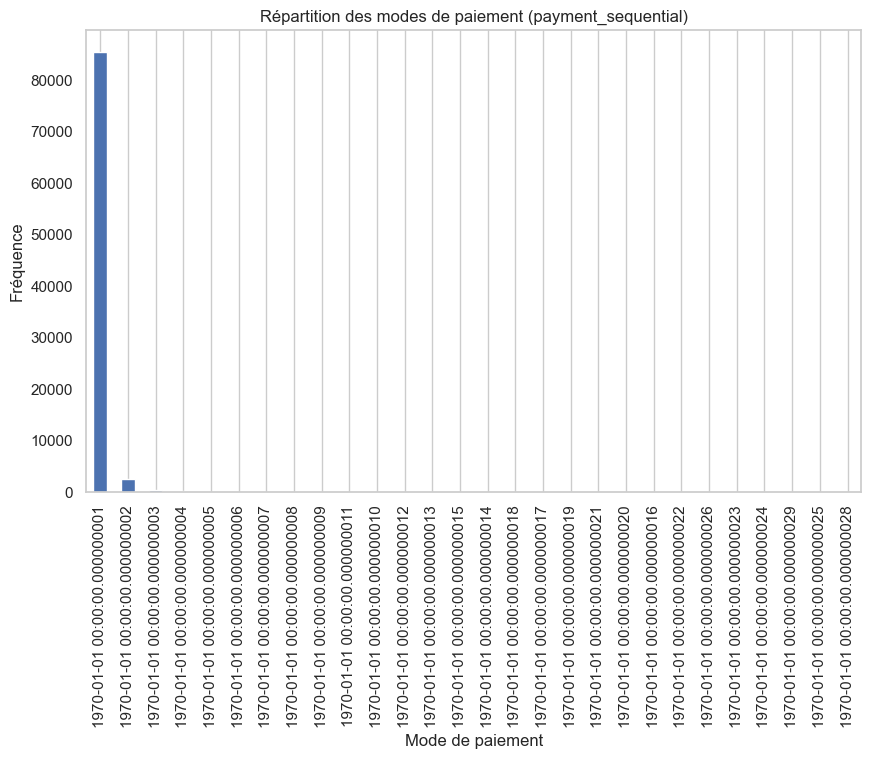

Modes de paiement dans 'payment_type':
payment_type
credit_card    65814
wallet         17302
voucher         4911
debit_card      1289
Name: count, dtype: int64


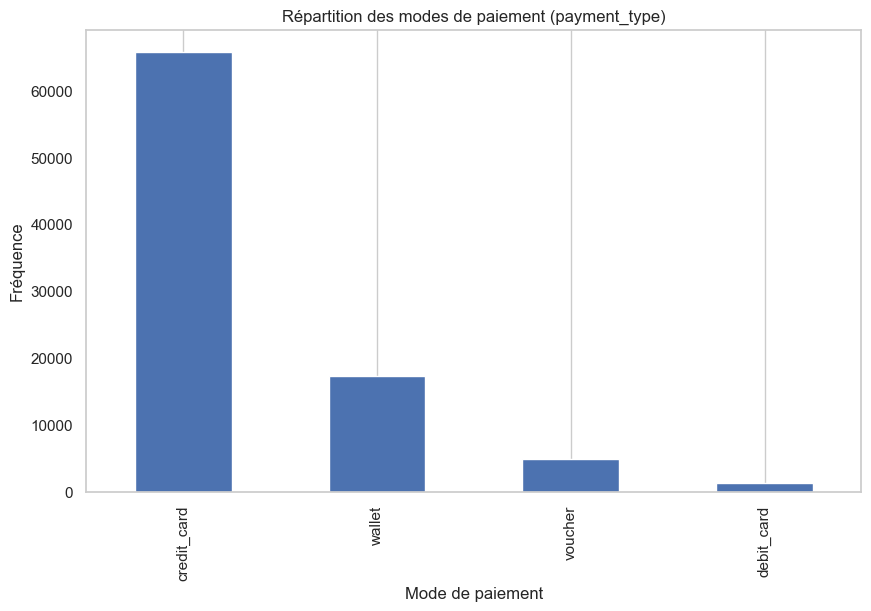

Modes de paiement dans 'payment_installments':
payment_installments
1970-01-01 00:00:00.000000001    44313
1970-01-01 00:00:00.000000002    10325
1970-01-01 00:00:00.000000003     8907
1970-01-01 00:00:00.000000004     6032
1970-01-01 00:00:00.000000010     5331
1970-01-01 00:00:00.000000005     4600
1970-01-01 00:00:00.000000008     3927
1970-01-01 00:00:00.000000006     3580
1970-01-01 00:00:00.000000007     1401
1970-01-01 00:00:00.000000009      560
1970-01-01 00:00:00.000000012      128
1970-01-01 00:00:00.000000015       73
1970-01-01 00:00:00.000000018       26
1970-01-01 00:00:00.000000024       24
1970-01-01 00:00:00.000000011       18
1970-01-01 00:00:00.000000013       17
1970-01-01 00:00:00.000000020       16
1970-01-01 00:00:00.000000014       11
1970-01-01 00:00:00.000000021       10
1970-01-01 00:00:00.000000016        6
1970-01-01 00:00:00.000000017        6
1970-01-01 00:00:00.000000000        3
1970-01-01 00:00:00.000000023        1
1970-01-01 00:00:00.000000022      

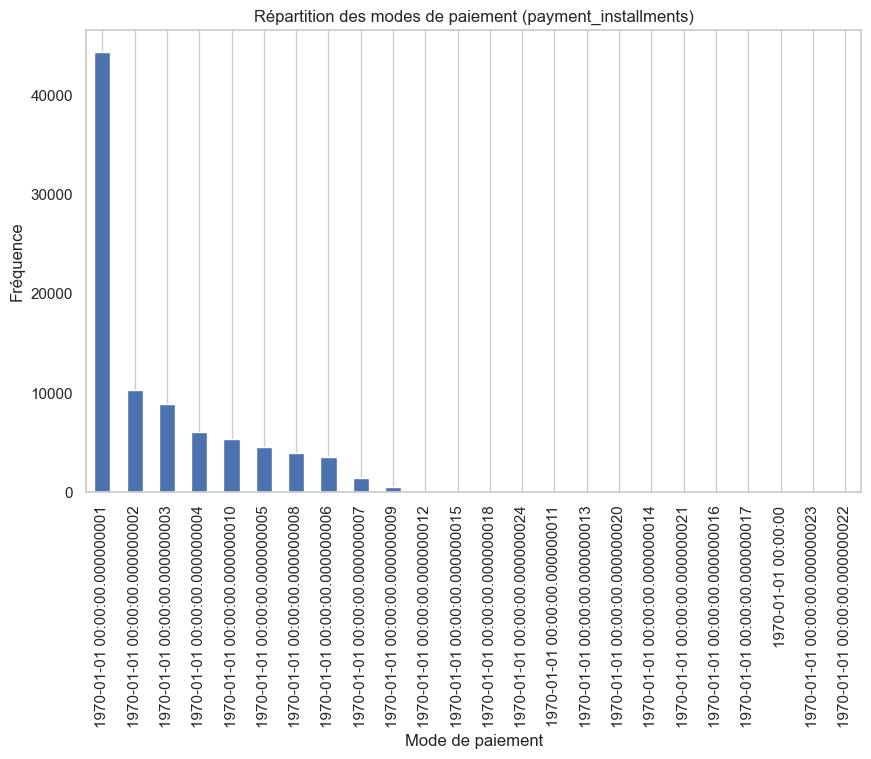

Modes de paiement dans 'payment_value':
payment_value
1970-01-01 00:00:00.000000033    541
1970-01-01 00:00:00.000000145    483
1970-01-01 00:00:00.000000041    408
1970-01-01 00:00:00.000000050    384
1970-01-01 00:00:00.000000118    367
                                ... 
1970-01-01 00:00:00.000001619      1
1970-01-01 00:00:00.000001782      1
1970-01-01 00:00:00.000001232      1
1970-01-01 00:00:00.000001728      1
1970-01-01 00:00:00.000002607      1
Name: count, Length: 1592, dtype: int64


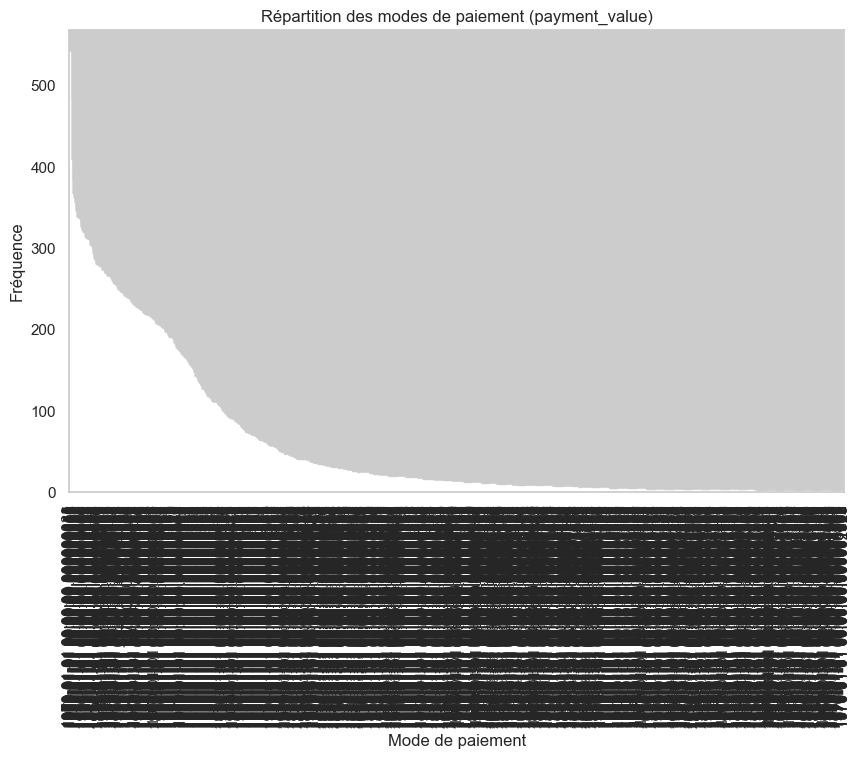


Analyse des paiements pour le dataset 'df_Orders':
Aucune colonne pertinente pour les paiements détectée dans ce dataset.

Analyse des paiements pour le dataset 'df_OrderItems':
Aucune colonne pertinente pour les paiements détectée dans ce dataset.


In [9]:
# Analyse des paiements

# Analyser les données de paiements pour chaque dataset
for name, df in dataframes.items():
    print(f"\nAnalyse des paiements pour le dataset '{name}':")
    
    # Vérifier si des colonnes pertinentes pour les paiements existent
    payment_mode_columns = [col for col in df.columns if 'paiement' in col.lower() or 'payment' in col.lower()]
    payment_delay_columns = [col for col in df.columns if 'delai' in col.lower() or 'delay' in col.lower()]
    payment_amount_columns = [col for col in df.columns if 'montant' in col.lower() or 'amount' in col.lower()]
    
    if payment_mode_columns:
        for col in payment_mode_columns:
            # Analyser les modes de paiement
            payment_modes = df[col].value_counts()
            print(f"Modes de paiement dans '{col}':")
            print(payment_modes)
            
            # Visualiser les modes de paiement
            plt.figure()
            payment_modes.plot(kind='bar', title=f"Répartition des modes de paiement ({col})")
            plt.xlabel("Mode de paiement")
            plt.ylabel("Fréquence")
            plt.grid(axis='y')
            plt.show()
    
    if payment_delay_columns:
        for col in payment_delay_columns:
            # Analyser les délais de paiement
            payment_delays = df[col].dropna()
            print(f"Statistiques des délais de paiement dans '{col}':")
            print(payment_delays.describe())
            
            # Visualiser les délais de paiement
            plt.figure()
            sns.histplot(payment_delays, kde=True, bins=20)
            plt.title(f"Distribution des délais de paiement ({col})")
            plt.xlabel("Délai de paiement")
            plt.ylabel("Fréquence")
            plt.grid(axis='y')
            plt.show()
    
    if payment_amount_columns:
        for col in payment_amount_columns:
            # Analyser les montants de paiement
            payment_amounts = df[col].dropna()
            print(f"Statistiques des montants de paiement dans '{col}':")
            print(payment_amounts.describe())
            
            # Visualiser les montants de paiement
            plt.figure()
            sns.boxplot(x=payment_amounts)
            plt.title(f"Distribution des montants de paiement ({col})")
            plt.xlabel("Montant de paiement")
            plt.grid(axis='x')
            plt.show()
    
    if not (payment_mode_columns or payment_delay_columns or payment_amount_columns):
        print("Aucune colonne pertinente pour les paiements détectée dans ce dataset.")

# Analyse logistique
Analyser les données logistiques, comme les délais de livraison, les zones géographiques, etc.


Analyse logistique pour le dataset 'df_Customers':
Aucune colonne pertinente pour la logistique détectée dans ce dataset.

Analyse logistique pour le dataset 'df_Products':
Aucune colonne pertinente pour la logistique détectée dans ce dataset.

Analyse logistique pour le dataset 'df_Payments':
Aucune colonne pertinente pour la logistique détectée dans ce dataset.

Analyse logistique pour le dataset 'df_Orders':
Statistiques des délais de livraison dans 'order_estimated_delivery_date':
count                            89316
mean     2018-01-21 16:16:51.850060544
min                2016-10-20 00:00:00
25%                2017-09-29 00:00:00
50%                2018-02-14 00:00:00
75%                2018-05-24 00:00:00
max                2018-10-25 00:00:00
Name: order_estimated_delivery_date, dtype: object


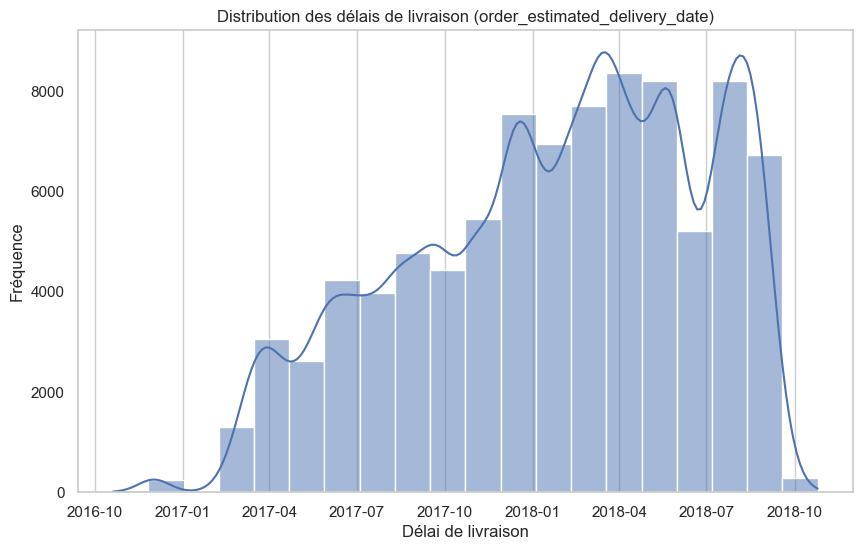

Répartition des statuts logistiques dans 'order_status':
order_status
delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: count, dtype: int64


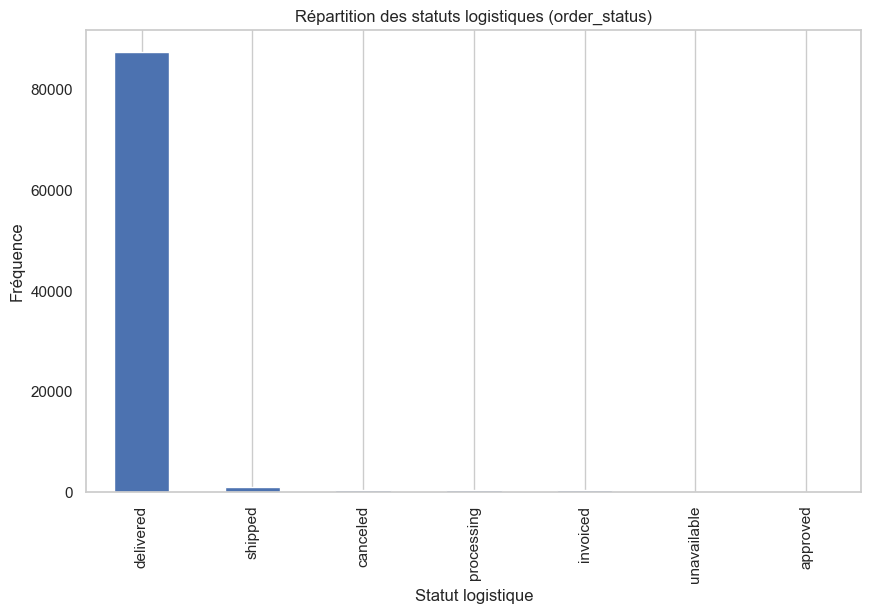


Analyse logistique pour le dataset 'df_OrderItems':
Aucune colonne pertinente pour la logistique détectée dans ce dataset.


In [10]:
# Analyse logistique

# Analyser les données logistiques pour chaque dataset
for name, df in dataframes.items():
    print(f"\nAnalyse logistique pour le dataset '{name}':")
    
    # Vérifier si des colonnes pertinentes pour la logistique existent
    delivery_time_columns = [col for col in df.columns if 'livraison' in col.lower() or 'delivery' in col.lower()]
    geographic_columns = [col for col in df.columns if 'zone' in col.lower() or 'region' in col.lower() or 'location' in col.lower()]
    logistic_status_columns = [col for col in df.columns if 'statut' in col.lower() or 'status' in col.lower()]
    
    if delivery_time_columns:
        for col in delivery_time_columns:
            # Analyser les délais de livraison
            delivery_times = df[col].dropna()
            print(f"Statistiques des délais de livraison dans '{col}':")
            print(delivery_times.describe())
            
            # Visualiser les délais de livraison
            plt.figure()
            sns.histplot(delivery_times, kde=True, bins=20)
            plt.title(f"Distribution des délais de livraison ({col})")
            plt.xlabel("Délai de livraison")
            plt.ylabel("Fréquence")
            plt.grid(axis='y')
            plt.show()
    
    if geographic_columns:
        for col in geographic_columns:
            # Analyser les zones géographiques
            geographic_distribution = df[col].value_counts()
            print(f"Répartition géographique dans '{col}':")
            print(geographic_distribution)
            
            # Visualiser la répartition géographique
            plt.figure()
            geographic_distribution.plot(kind='bar', title=f"Répartition géographique ({col})")
            plt.xlabel("Zone géographique")
            plt.ylabel("Fréquence")
            plt.grid(axis='y')
            plt.show()
    
    if logistic_status_columns:
        for col in logistic_status_columns:
            # Analyser les statuts logistiques
            logistic_status_distribution = df[col].value_counts()
            print(f"Répartition des statuts logistiques dans '{col}':")
            print(logistic_status_distribution)
            
            # Visualiser les statuts logistiques
            plt.figure()
            logistic_status_distribution.plot(kind='bar', title=f"Répartition des statuts logistiques ({col})")
            plt.xlabel("Statut logistique")
            plt.ylabel("Fréquence")
            plt.grid(axis='y')
            plt.show()
    
    if not (delivery_time_columns or geographic_columns or logistic_status_columns):
        print("Aucune colonne pertinente pour la logistique détectée dans ce dataset.")

# Analyse des statuts de commandes
Examiner les différents statuts de commandes et leur répartition.


Analyse des statuts de commandes pour le dataset 'df_Customers':
Aucune colonne pertinente pour les statuts de commandes détectée dans ce dataset.

Analyse des statuts de commandes pour le dataset 'df_Products':
Aucune colonne pertinente pour les statuts de commandes détectée dans ce dataset.

Analyse des statuts de commandes pour le dataset 'df_Payments':
Aucune colonne pertinente pour les statuts de commandes détectée dans ce dataset.

Analyse des statuts de commandes pour le dataset 'df_Orders':
Répartition des statuts de commandes dans 'order_status':
order_status
delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: count, dtype: int64


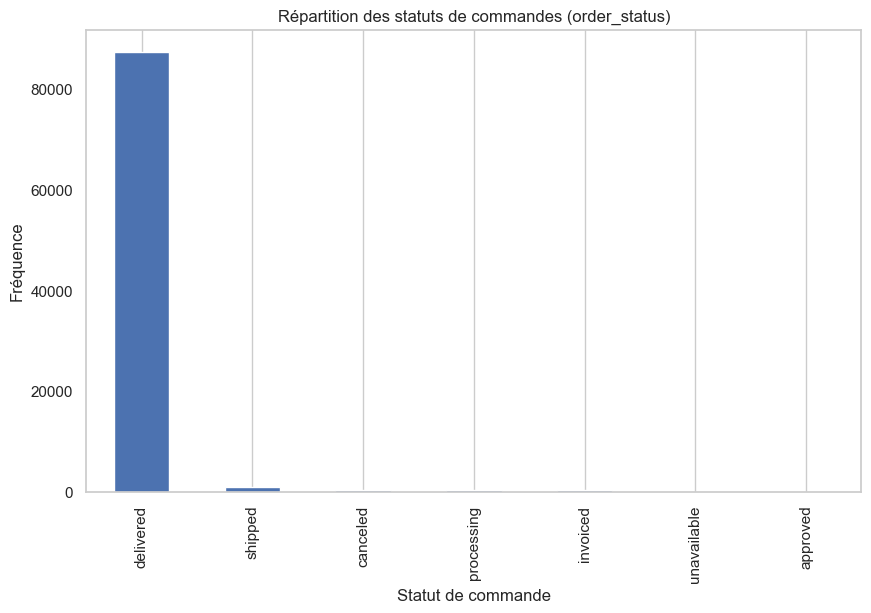


Analyse des statuts de commandes pour le dataset 'df_OrderItems':
Aucune colonne pertinente pour les statuts de commandes détectée dans ce dataset.


In [11]:
# Analyse des statuts de commandes

# Examiner les différents statuts de commandes et leur répartition
for name, df in dataframes.items():
    print(f"\nAnalyse des statuts de commandes pour le dataset '{name}':")
    
    # Identifier les colonnes pertinentes pour les statuts de commandes
    status_columns = [col for col in df.columns if 'statut' in col.lower() or 'status' in col.lower()]
    
    if status_columns:
        for col in status_columns:
            # Analyser la répartition des statuts
            status_distribution = df[col].value_counts()
            print(f"Répartition des statuts de commandes dans '{col}':")
            print(status_distribution)
            
            # Visualiser la répartition des statuts
            plt.figure()
            status_distribution.plot(kind='bar', title=f"Répartition des statuts de commandes ({col})")
            plt.xlabel("Statut de commande")
            plt.ylabel("Fréquence")
            plt.grid(axis='y')
            plt.show()
    else:
        print("Aucune colonne pertinente pour les statuts de commandes détectée dans ce dataset.")

# Analyse des corrélations
Calculer et visualiser les corrélations entre les variables numériques.


Analyse des corrélations pour le dataset 'df_Customers':
Aucune colonne numérique détectée dans ce dataset.

Analyse des corrélations pour le dataset 'df_Products':
Matrice de corrélation:
                   product_weight_g  product_length_cm  product_height_cm  \
product_weight_g           1.000000           0.459008           0.583628   
product_length_cm          0.459008           1.000000           0.195093   
product_height_cm          0.583628           0.195093           1.000000   
product_width_cm           0.502956           0.532727           0.279517   

                   product_width_cm  
product_weight_g           0.502956  
product_length_cm          0.532727  
product_height_cm          0.279517  
product_width_cm           1.000000  


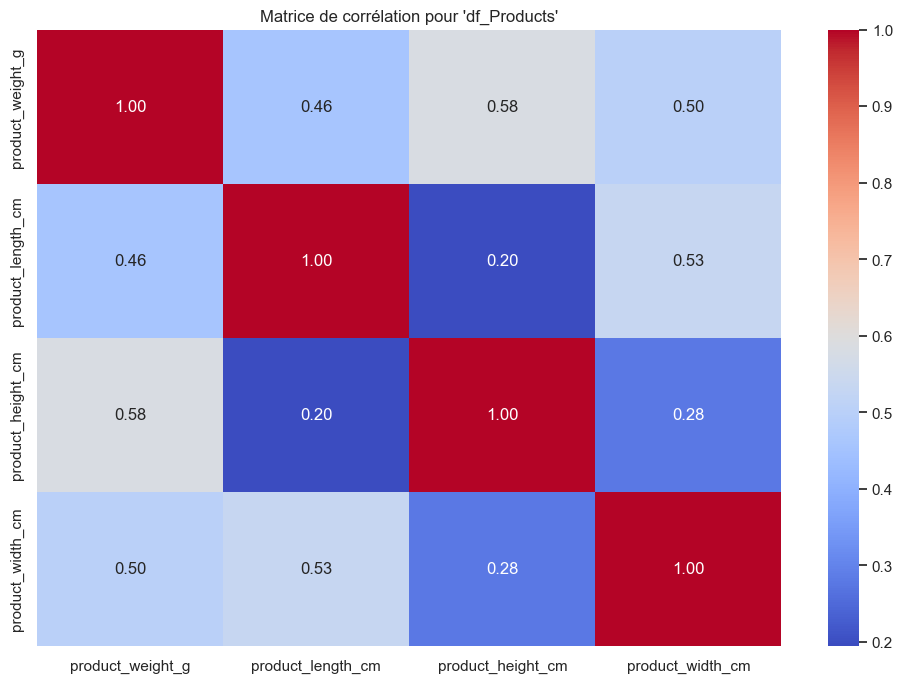


Analyse des corrélations pour le dataset 'df_Payments':
Aucune colonne numérique détectée dans ce dataset.

Analyse des corrélations pour le dataset 'df_Orders':
Aucune colonne numérique détectée dans ce dataset.

Analyse des corrélations pour le dataset 'df_OrderItems':
Aucune colonne numérique détectée dans ce dataset.


In [12]:
# Analyse des corrélations

# Calculer et visualiser les corrélations entre les variables numériques pour chaque dataset
for name, df in dataframes.items():
    print(f"\nAnalyse des corrélations pour le dataset '{name}':")
    
    # Sélectionner uniquement les colonnes numériques
    numeric_columns = df.select_dtypes(include=np.number)
    
    if not numeric_columns.empty:
        # Calculer la matrice de corrélation
        correlation_matrix = numeric_columns.corr()
        print("Matrice de corrélation:")
        print(correlation_matrix)
        
        # Visualiser la matrice de corrélation
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title(f"Matrice de corrélation pour '{name}'")
        plt.show()
    else:
        print("Aucune colonne numérique détectée dans ce dataset.")

# Décisions pour le modèle
Identifier les variables pertinentes et les transformations nécessaires pour préparer les données pour un modèle machine learning.

In [13]:
# Décisions pour le modèle

# Identifier les variables pertinentes et les transformations nécessaires pour préparer les données pour un modèle machine learning
for name, df in dataframes.items():
    print(f"\nDécisions pour le modèle basées sur le dataset '{name}':")
    
    # Identifier les colonnes avec des valeurs manquantes
    missing_values = df.isnull().sum()
    columns_with_missing = missing_values[missing_values > 0].index.tolist()
    if columns_with_missing:
        print(f"Colonnes avec des valeurs manquantes: {columns_with_missing}")
        print("Action recommandée: Imputer les valeurs manquantes ou supprimer les colonnes si elles ne sont pas pertinentes.")
    
    # Identifier les colonnes catégoriques
    categorical_columns = df.select_dtypes(include='object').columns.tolist()
    if categorical_columns:
        print(f"Colonnes catégoriques détectées: {categorical_columns}")
        print("Action recommandée: Encoder les colonnes catégoriques (e.g., one-hot encoding ou label encoding).")
    
    # Identifier les colonnes numériques
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    if numeric_columns:
        print(f"Colonnes numériques détectées: {numeric_columns}")
        print("Action recommandée: Normaliser ou standardiser les colonnes numériques.")
    
    # Vérifier les colonnes avec des valeurs aberrantes
    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            print(f"Colonne '{col}' contient des valeurs aberrantes.")
            print("Action recommandée: Traiter les valeurs aberrantes (e.g., les supprimer ou les remplacer).")
    
    # Vérifier les colonnes temporelles
    datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
    if datetime_columns:
        print(f"Colonnes temporelles détectées: {datetime_columns}")
        print("Action recommandée: Extraire des caractéristiques temporelles (e.g., année, mois, jour).")
    
    # Vérifier les colonnes avec faible variance
    low_variance_columns = [col for col in numeric_columns if df[col].nunique() <= 1]
    if low_variance_columns:
        print(f"Colonnes avec faible variance: {low_variance_columns}")
        print("Action recommandée: Supprimer les colonnes avec faible variance.")
    
    # Vérifier les corrélations élevées entre les colonnes numériques
    if numeric_columns:
        correlation_matrix = df[numeric_columns].corr().abs()
        high_correlation_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1 != col2 and correlation_matrix.loc[col1, col2] > 0.8]
        if high_correlation_pairs:
            print(f"Paires de colonnes avec corrélation élevée (> 0.8): {high_correlation_pairs}")
            print("Action recommandée: Supprimer ou combiner les colonnes fortement corrélées.")
    
    print("Résumé des actions recommandées pour ce dataset: Préparer les données en suivant les étapes ci-dessus.")


Décisions pour le modèle basées sur le dataset 'df_Customers':
Colonnes catégoriques détectées: ['customer_id', 'customer_city', 'customer_state']
Action recommandée: Encoder les colonnes catégoriques (e.g., one-hot encoding ou label encoding).


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed ind

Colonnes temporelles détectées: ['customer_zip_code_prefix']
Action recommandée: Extraire des caractéristiques temporelles (e.g., année, mois, jour).
Résumé des actions recommandées pour ce dataset: Préparer les données en suivant les étapes ci-dessus.

Décisions pour le modèle basées sur le dataset 'df_Products':
Colonnes avec des valeurs manquantes: ['product_category_name', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Action recommandée: Imputer les valeurs manquantes ou supprimer les colonnes si elles ne sont pas pertinentes.
Colonnes catégoriques détectées: ['product_id', 'product_category_name']
Action recommandée: Encoder les colonnes catégoriques (e.g., one-hot encoding ou label encoding).
Colonnes numériques détectées: ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Action recommandée: Normaliser ou standardiser les colonnes numériques.
Colonne 'product_weight_g' contient des valeurs aberrantes.
Action rec

/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]


Résumé des actions recommandées pour ce dataset: Préparer les données en suivant les étapes ci-dessus.

Décisions pour le modèle basées sur le dataset 'df_Payments':
Colonnes catégoriques détectées: ['order_id', 'payment_type']
Action recommandée: Encoder les colonnes catégoriques (e.g., one-hot encoding ou label encoding).


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]


Colonnes temporelles détectées: ['payment_sequential', 'payment_installments', 'payment_value']
Action recommandée: Extraire des caractéristiques temporelles (e.g., année, mois, jour).
Résumé des actions recommandées pour ce dataset: Préparer les données en suivant les étapes ci-dessus.

Décisions pour le modèle basées sur le dataset 'df_Orders':
Colonnes avec des valeurs manquantes: ['order_approved_at', 'order_delivered_timestamp']
Action recommandée: Imputer les valeurs manquantes ou supprimer les colonnes si elles ne sont pas pertinentes.
Colonnes catégoriques détectées: ['order_id', 'customer_id', 'order_status', 'order_approved_at', 'order_delivered_timestamp']
Action recommandée: Encoder les colonnes catégoriques (e.g., one-hot encoding ou label encoding).


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed ind

Colonnes temporelles détectées: ['order_purchase_timestamp', 'order_estimated_delivery_date']
Action recommandée: Extraire des caractéristiques temporelles (e.g., année, mois, jour).
Résumé des actions recommandées pour ce dataset: Préparer les données en suivant les étapes ci-dessus.

Décisions pour le modèle basées sur le dataset 'df_OrderItems':
Colonnes catégoriques détectées: ['order_id', 'product_id', 'seller_id']
Action recommandée: Encoder les colonnes catégoriques (e.g., one-hot encoding ou label encoding).


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]


Colonnes temporelles détectées: ['price', 'shipping_charges']
Action recommandée: Extraire des caractéristiques temporelles (e.g., année, mois, jour).
Résumé des actions recommandées pour ce dataset: Préparer les données en suivant les étapes ci-dessus.


/var/folders/fq/h9_0t0kj1nl0zw5x86l74tyc0000gn/T/ipykernel_36202/1818718303.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.to_datetime(df[col], errors='coerce').notna().all()]
